<a href="https://colab.research.google.com/github/frankausberlin/notebook-collection/blob/main/backpropagationnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width=1000><tr><td align=center></td></tr></table>
<table><tr><td width=1200 align=center>

# <font size='+3'/><b>Backpropagation of error
</b>is an algorithm that implements the<br><br>
<font size='+3'/><b>extended delta rule
</td></tr></table>

<br>

* This notebook contains **schematic drawings** for a better understanding of the extended delta rule formula.
* The tabular rollout of the **formula** into input, hidden and output layers serves as the basis for the **impementation**.
* The formula is examplary implemented with **numpy**, only the last version uses **pytorch** with **cuda**.
* In four steps the examplary **implementation evolves** to an object oriented model of a Multi Layer Perceptron (**MLP**).<br>
* Equivalently, the **calculation of the deltas** evolves from simple versions to a **broadcast** version for an additional **batch** dimension.<br>
* To **play** with it, there are implementations of simple models for the **mnist** digit dataset with the developed classes.
* And finaly there are **tool functions** for a **seed mechanic** to perform **experiments**.

<table width=1000><tr></tr><tr><td align=right>
$\small\text{Thanks to all people who provide materials for learning.}$<br>
$\small\text{This notebook is dedicated to you.}$</td></tr></table>

<table><tr><td align='center' width=1000 colspan = 3>

##<font size='+3' color='purple'><b>Extended delta rule formula</b><br>
$\rule{1000px}{0.4pt}$
</td></tr>



<tr><td colspan=3>

perceptron_simple.svg<td><tr>



<tr><td width=460>

<font size='-1'>(1) Multiple inputs $x$, a stimulation $\sum$ followed by an activation $\varphi$ and one<br> output $\hat y$. This calculation unit $\bigcirc$ is called **perceptron**. Measuring the<br> difference between the output $\hat y$ and the target $y$ with a loss $\mathcal L$ function is<br> the basis of **supervised learning**.<br><br>
(2) The units $\bigcirc_j \bigcirc_k$ are connected by weighted $w_{kj}$ **signals**. The index<br> of the **weighting** $_{kj}$ indicates the position of the perceptron in<br> its **layer** $_k$ and the position of the perceptron in the previous layer $_j$.<br>
</td><td width=40>$\left.{\;\\\;\\\;\\}\right\vert$</td><td width=500>

<font size='-1'>(3) Each perceptron $\bigcirc_k$ has an individual **set of weights** $w_{k1..3}$ for all inputs <br> signals $_{1..3}$ and a bias $b_k$. The number of weights $_3$ corresponds to the <br>number of perceptrons $_3$ in the previous layer $_j$.<br><br>
(4) Calculation of the **delta $\delta _i$ value** within a perceptron by multiplying the <br>sum $\sum _j$ of all weighted $w_{ji}$ delta values $\delta _j$ of the next layer $_j$ with respect<br> to itself $_i$ by the net input $net_i$ whitch is transfered by the derivative of its<br> activation function $\varphi'$: <b>backpropagates $\delta_j$ to $\delta_i$.</td></tr></table>


<table><tr><td width=490>

$$\color{purple}{\Huge\Delta_{ji} = -\eta \;\; \delta_j \;\; \hat y_i }$$</td><td width=40>$\left.{\;\\\;\\\;\\}\right\vert$</td><td width=480>

$\color{purple}{
\huge \delta_j = \large \begin{cases}
\varphi\,'(net_j)\cdot \mathcal L\,' (y, \hat y) &\color{black}{: \small \text{output layer}}\\
\varphi\,'(net_j)\cdot \sum_k{\delta_k w_{kj}} &\color{black}{: \small \text{hidden layer}}
\end{cases}\\
\rule{400px}{0.4pt}\\
\Large \color{purple}{\Delta_j ^b = - \eta \delta_j b_j} \color{black}{\small \qquad \text{for bias}}
}$</td></tr>



<tr></tr><tr><td colspan=3>$\quad$<b>Note</b>: $\hat y_i$ is the output from previous layer. You can write equivalent $out_i$ or $inp_j$ or $s_i$.</td></tr></table>



<table><tr><td colspan=3>

---
</td></tr><tr></tr><tr><td>

$$\begin{align*}
\theta &= \sum {x w} + b\\
net &= \theta (x)\\
\hat y &= \varphi (net)\\
loss &= \mathcal L (y, \hat y)
\end{align*}$$
</td><td width=500>

$$\quad \left| \begin{array}{ll}\begin{align*}
x, \theta &= \text{input signals, stimulation (theta)}\\
w, b &= \text{parameter: weights, bias}\\ 
net &= \text{net input}\\
\varphi , \varphi ' &= \text {activation function (phi), derivative}\\
\qquad \mathcal L, \mathcal L ' &= \text {error function, derivative}\\
\end{align*}\end{array}\right.$$
</td><td >

$$\quad \left| \begin{array}{ll}\begin{align*}
y &= \text {expected output}\\
\hat y &= \text{predicted output}\\
\eta &= \text{learningrate (eta)}\\
\qquad \Delta &= \text {change value}\\
&\quad\small{\left[w_{ji}^{new} = w_{ji}^{old}+\Delta_{ji}\right]}\\
\end{align*}\end{array}\right.$$
</td></tr>
</table>

----

**roll out formula**<br>

<table>
<tr><td align='center'>input layer<br><br>$$\huge i$$</td><td colspan=2 align='center' width=350>hidden layer<br><br>$$\huge j$$</td><td colspan=2 align='center' width=350>output layer<br><br>$$\huge k$$</td><td align='center'><font size='+2' color='purple'><b>training</td></tr>

<tr><td>signals</td><td>stimulus</td><td align='center' width=350>activation $\varphi_h$</td><td>stimulus</td><td align='center' width=350>activation $\varphi_o$</td><td align='center' width=200>lossfn</td></tr>

<tr><td>$\huge s_1$ <br><br><br><br><br><br><br><br></td><td>$s_1 w_{11}$+<br>$s_2 w_{12}$+<br>...<br>$s_i w_{1i}$<br><br><br><br><br><br><br><br></td><td><font size='-1'><b>forward</b><br>-->$\;\huge net_1 |\;\;\;\varphi_h (net_1)$  -->  $\huge s_1$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward</b><br>$\color{purple}{\Large \delta_1 = \varphi_h'(net_1)\cdot \sum_k {\delta_k w_{k1}}}$<br>$\color{purple}{\Large\Delta_{1i} = -\eta \delta_1 s_i}\;\;| \Delta_1^b=-\eta\delta_1 b_1$</td><td>$s_1 w_{11}$+<br>$s_2 w_{12}$+<br>...<br>$s_j w_{1j}$<br><br><br><br><br><br><br><br></td><td><font size='-1'><b>forward</b><br>-->$\;\huge net_1|\;\;\;\varphi_o (net_1)$  -->  $\huge \hat y_1$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward</b><br>$\color{purple}{\Large \delta_1 = \varphi_o'(net_1)\cdot \mathcal L'(y_1,\hat y_1)}$<br>$\color{purple}{\Large \Delta_{1j} = -\eta \delta_1 s_j}\;\;| \Delta_1^b=-\eta\delta_1 b_1$</td><td align='center'>$\Large \mathcal L (y_1, \hat y_1)$  -->  $\huge e_1$</td></tr>

<tr><td>$\huge s_2$ <br><br><br><br><br><br><br><br></td><td>$s_2 w_{21}$+<br>$s_2 w_{22}$+<br>...<br>$s_i w_{2i}$<br><br><br><br><br><br><br><br></td><td><font size='-1'><b>forward</b><br>-->$\;\huge net_2|\;\;\;\varphi_h (net_2)$  -->  $\huge s_2$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward</b><br>$\color{purple}{\Large \delta_2 = \varphi_h'(net_2)\cdot \sum_k {\delta_k w_{k2}}}$<br>$\color{purple}{\Large\Delta_{2i} = -\eta \delta_2 s_i}\;\;| \Delta_2^b=-\eta\delta_2 b_2$</td><td>$s_2 w_{21}$+<br>$s_2 w_{22}$+<br>...<br>$s_j w_{2j}$<br><br><br><br><br><br><br><br></td><td><font size='-1'><b>forward</b><br>-->$\;\huge net_2|\;\;\;\varphi_o (net_2)$  -->  $\huge \hat y_2$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward</b><br>$\color{purple}{\Large \delta_2 = \varphi_o'(net_2)\cdot \mathcal L'(y_2,\hat y_2)}$<br>$\color{purple}{\Large \Delta_{2j} = -\eta \delta_2 s_j}\;\;| \Delta_2^b=-\eta\delta_2 b_2$</td><td align='center'>$\Large \mathcal L (y_2, \hat y_2)$  -->  $\huge e_2$</td></tr>

<tr><td>$...$<br><br>$\huge s_i$ <br><br><br><br><br><br><br><br></td><td>$s_1 w_{j1}$+<br>$s_2 w_{j2}$+<br>...<br>$s_i w_{ji}$<br><br><br><br><br><br><br><br></td><td><font size='-1'><b>forward</b><br>-->$\;\huge net_j|\;\;\;\varphi_h (net_j)$  -->  $\huge s_j$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward</b><br>$\color{purple}{\Large \delta_j = \varphi_h'(net_j)\cdot \sum_k {\delta_k w_{kj}}}$<br>$\color{purple}{\Large\Delta_{ji} = -\eta \delta_j s_i}\;\;| \Delta_j^b=-\eta\delta_j b_j$</td><td>$s_1 w_{k1}$+<br>$s_2 w_{k2}$+<br>...<br>$s_j w_{kj}$<br><br><br><br><br><br><br><br></td><td><font size='-1'><b>forward</b><br>-->$\;\huge net_k|\;\;\;\varphi_o (net_k)$  -->  $\huge \hat y_k$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward</b><br>$\color{purple}{\Large \delta_k = \varphi_o'(net_k)\cdot \mathcal L'(y_k, \hat y_k)}$<br>$\color{purple}{\Large \Delta_{kj} = -\eta \delta_k s_j}\;\;| \Delta_k^b=-\eta\delta_k b_k$</td><td align='center'>$\Large \mathcal L (y_k, \hat y_k)$  -->  $\huge e_k$</td></tr>
<tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td></tr>
</table>



## Numpy implementation



In [37]:
#@title version 1 - formula{ form-width: "300px" }
#@markdown * Hard coded multi layer perceptron in 100% numpy.
#@markdown * Three perceptrons in hidden and two in output layer.
#@markdown * The perceptrons in hidden layer expect five input signals.
#@markdown * The model is initialized and a prediction is made with it.
#@markdown * The target is used to calculate an error.
#@markdown * The delta values and change values are calculated by the delta rule.
#@markdown * After the optimization the new prediction has a better loss value.
from numpy            import array, sum, mean, exp
from numpy.random     import randn, seed 
seed                  (42)

act_h    = sigmoid = lambda x: 1 / (1 + exp(-x))               # activation hidden layer: sigmoid
act_o    = sigmoid                                             # activation output layer: sigmoid
act_h_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation hidden
act_o_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation output
lossfn   = lambda t, y: mean (1/2 * (t-y)**2)                  # error function: mse (mean squared error)
lossfn_  = lambda t, y: y - t                                  # derivation error function

inp      = array ( [0.1, 0.2, 0.3, 0.4, 0.5] )                 # x : 5 input signals
tar      = array ( [1.0, 0.0] )                                # y : 2 expected outputs
eta      = 0.5                                                 # learning rate

wei_h    = randn (3,5)                                         #                         #
bia_h    = randn (3)                                           # hidden layer            #
net_h    = wei_h.dot (inp) + bia_h                             # with 3 perceptrons      #
out_h    = act_h (net_h)                                       #                         # forward:
                                                                                         # hidden -> output
wei_o    = randn (2,3)                                         #                         #
bia_o    = randn (2)                                           # output layer            #
net_o    = wei_o.dot (out_h) + bia_o                           # with 2 perceptrons      #
out_o    = act_o (net_o)                                       #                         #

error    = lossfn (tar, out_o)                                 # calculate error         # backward: output -> hidden        
#####################################################################################################################
del_o    = act_o_ (net_o) * lossfn_ (tar, out_o)               # del_o -> del_h -> cha_                             #
K        = range (wei_o.shape[0])                              # range for all perceptrons in output layer          #
del_h    = act_h_ (net_h) *\
               array ([ sum([del_o[k]*wei_o[k][0] for k in K]) ,          # sum_k(d_k * w_kj) |                     #
                        sum([del_o[k]*wei_o[k][1] for k in K]) ,          # sum_k(d_k * w_kj) | for all in hidden   #  
                        sum([del_o[k]*wei_o[k][2] for k in K])  ])        # sum_k(d_k * w_kj) | layer j             #
                                                                                                                    #
cha_hw   = array ( [-eta * del_h[0] * inp,      -eta * del_h[1] * inp,      -eta * del_h[2] * inp     ])            #
cha_hb   = array ( [-eta * del_h[0] * bia_h[0], -eta * del_h[1] * bia_h[1], -eta * del_h[2] * bia_h[2]])            #
cha_ow   = array ( [-eta * del_o[0] * out_h,    -eta * del_o[1] * out_h] )                                          #
cha_ob   = array ( [-eta * del_o[0] * bia_o[0], -eta * del_o[1] * bia_o[1]] )                                       #
############################ BACKPROPAGATION OF ERROR IMPLEMENTS THE EXTENDED DELTA-RULE ############################
wei_h    += cha_hw                                             #
bia_h    += cha_hb                                             # update weights
wei_o    += cha_ow                                             # and bias
bia_o    += cha_ob                                             #

# check
err_new  = lossfn (tar, act_o ( wei_o.dot ( act_h ( wei_h.dot (inp) + bia_h ) ) + bia_o ) )
err_new  < error, error.round(4), err_new.round(4)


(True, 0.2014, 0.1995)

In [38]:
#@title    version 2 - batches { form-width: "300px" }
#@markdown * nrH, nrO: perceptron count for hidden and output layer
#@markdown * eta, bs: adding learning rate and batch size
#@markdown * inp, tar: inputs and targets as batch
#@markdown * @: replace '.dot' with '@'
#@markdown * computation: delta h in 2 loops and change values for weights with broadcast
#@markdown * stochastic step: needed for the batch mechanism 
from numpy            import array, sum, mean, exp
from numpy.random     import randn, seed 
seed                  (42)

act_h    = sigmoid = lambda x: 1 / (1 + exp(-x))               # activation hidden layer: sigmoid
act_o    = sigmoid                                             # activation output layer: sigmoid
act_h_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation hidden
act_o_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation output
lossfn   = lambda t, y: mean (1/2*(t-y)**2)                    # error function: mse (mean squared error)
lossfn_  = lambda t, y: y - t                                  # derivation error function

nrH, nrO = 3, 2                                                # nr hiddens / outputs perceptrons
eta, bs  = 0.5, 1                                              # learning rate, batch size

inp      = array([0.1, 0.2, 0.3, 0.4, 0.5]*bs).reshape (-1,5)  # x : 5 input signals     # mini batch
tar      = array([1.0, 0.0]*bs).reshape (-1,2)                 # y : 2 expected outputs  # with bs entries

wei_h    = randn (nrH, inp.shape[-1])                          #                         #
bia_h    = randn (nrH)                                         # hidden layer            #
net_h    = inp @ wei_h.T + bia_h                               # with 3 perceptrons      #
out_h    = act_h (net_h)                                       #                         # 
                                                                                         # forward: hidden -> output
wei_o    = randn (nrO, out_h.shape[-1])                        #                         #
bia_o    = randn (nrO)                                         # output layer            #
net_o    = out_h @ wei_o.T + bia_o                             # with 2 perceptrons      #
out_o    = act_o (net_o)                                       #                         #

error    = lossfn (tar, out_o)                                 # calculate error         # backward: output -> hidden        
#####################################################################################################################
del_o    = act_o_ (net_o) * lossfn_ (tar, out_o)               # del_o -> del_h -> cha_                             #
J, K     = range (wei_h.shape[0]), range (wei_o.shape[0])      # range for all perceptrons in hidden, output layer  #
del_h    = act_h_ (net_h) *\
           array ([ sum([del_o[:,k]*wei_o[k][j] for k in K]) for j in J])  # sum_k(d_k * w_kj) for every j          #
                                                                           # [:,k] - extra dim of cause batch dim   #
cha_ow   = -eta * out_h * del_o[None,:].T                      #                                                    #                                                    #
cha_ob   = -eta * bia_o * del_o                                # change values via delta-rule                       #                                    #
cha_hw   = -eta * inp   * del_h[None,:].T                      # [None,:] - extra dim of cause batch dim            #
cha_hb   = -eta * bia_h * del_h                                #                                                    #
############################ BACKPROPAGATION OF ERROR IMPLEMENTS THE EXTENDED DELTA-RULE ############################
cha_hw, cha_ow = sum (cha_hw, axis=1), sum (cha_ow, axis=1)    # stochastic step: sum up change values
cha_hb, cha_ob = sum (cha_hb, axis=0), sum (cha_ob, axis=0)    # for mini batch -> reduce extra batch dim
wei_h += cha_hw                                                #
bia_h += cha_hb                                                # update weights
wei_o += cha_ow                                                # and bias
bia_o += cha_ob                                                #

# check
err_new  = lossfn (tar, act_o (act_h (inp @ wei_h.T + bia_h) @ wei_o.T + bia_o)) 
err_new < error, error.round(4), err_new.round(4)


(True, 0.2014, 0.1995)

In [75]:
#@title version 3 - classes { form-width: "300px" }
#@markdown * Design of the classes **```Perceptrons```** and **```Model_V3```**
#@markdown * The functionality of version 2 is divided between the two classes.
#@markdown * Computation delta for hidden through broadcast.
#@markdown * The handling of **multiple layers** is added.
#@markdown 
#@markdown **Use cases**<br>
#@markdown _Creation_: create a new model with multiple layers in one line.<br>
#@markdown _Prediction_: use the model to predict a batch of input data.<br>
#@markdown _Optimization_: offers a method to improve predictions.<br>

from numpy            import array, sum, mean, exp, arange, tanh, ones_like, where
from numpy.random     import randn, seed 
seed                  (42)

class Perceptrons:
  """ Represents a layer of perceptrons
    * Generates a callable object that implements the stimmulation and 
      activation of the perceptrons in this layer. 
    * It has an auto-signals-count mechansim.
    * Its a container for the attributes delta, changew, changeb.
    -- Attributes --
    Perceptrons.lastCount   : int    - number of perceptrons in last generated layer
    Perceptrons.activations : dict   - a collection of activation functions as dict.
    Perceptrons.activations_: dict   - a collection of derivations ot the activations.
    weights, bias           : array  - the parameter of all perceptrons of a a layer.
    activation, activation_ : lambda - associated activation and its derivative.
    inp, net, out           : array  - inputs, net-values (stimulation), output-values.
    delta                   : array  - the delta values for the Perceptrons.
    changew, changeb        : array  - the change values via the delta rule.
    -- Functions--
    __init__                : creates the layer.
    __call__                : returns the the output of the perceptrons.
    update                  : Update the model parameter
  """
  lastCount   = 1
  activations  = { 'sigmoid' : lambda x:  1 / (1 + exp(-x))}
  activations_ = { 'sigmoid' : lambda x: Perceptrons.activations['sigmoid'](x) * (1 - Perceptrons.activations['sigmoid'](x))}

  def __init__(self, count=1, inputs=-1, activation='sigmoid'):
    """ Creates the perceptron-layer-object
      * Creates a layer with <count> perceptrons with <inputs> input-signals and
        a specific activation function. 
      * Creates the required weights and biases as numpy-array.
      * Sets the Perceptron.lastCount attribute for auto-signals-mechanism
      * Sets the activation / derivation functions
      * Auto-signals: If <inputs> equals -1 the perceptron-count of the last layer will be used.
      count, inputs: int - number of perceptrons and input signals for each perceptron
      activation   : str - activation function
    """
    self.weights           = randn (count, inputs) if inputs > 0 else randn (count, Perceptrons.lastCount)
    self.bias              = randn (count)
    self.activation        = Perceptrons.activations[activation]
    self.activation_       = Perceptrons.activations_[activation]
    Perceptrons.lastCount  = count

  def __call__(self, x):
    """ Stimulate and activate the perceptrons.
      * Call the stimulation with x and do the activation with the result for every
        perceptron in this layer.
      * Create the attributes inp, net, out and returns out.
      * One output signal per perceptron.
      x     : array - a batch of input signals
      return: array - perceptrons output
    """
    self.inp, self.net = x, x @ self.weights.T + self.bias 
    self.out           = self.activation (self.net)
    return self.out

  def update (self):
    """ Update the model parameter with the change values.
    """
    self.weights += self.changew
    self.bias    += self.changeb


class Model_V3:
  """ A multi layer perceptron model
    * Generates a callable object for a batch of inputs.
    * Implements the forward part of the model in the call-function.
    * Implements the error function and optimization mechanism.
    -- Attributes --
    Model_V3.losses       : dict   - collection with loss-functions
    Model_V3.derivations  : dict   - collection with loss-derivations
    layers                : list   - the model layers
    lossfn                : lambda - loss-function
    lossfn_               : lambda - loss-derivation
    loss                  : string - loss id string
    -- Functions --
    __init__              : creates this object
    __call__              : the output of the last layer
    error                 : gives the loss-value 
    optimize              : improve the model parameter
  """
  losses      = {'mse': lambda t, y: mean (1/2*(t-y)**2) }
  losses_     = {'mse': lambda t, y: y - t }

  def __init__(self, *layers, loss='mse'):
    """ Creates the model-object
      layers: parameter - Perceptrons-objects
      loss  : string    - loss-function as string
    """  
    self.layers, self.lossfn, self.lossfn_, self.loss = layers, Model_V3.losses[loss], Model_V3.losses_[loss], loss

  def __call__(self, x):
    """ call-function for a batch of inputs
      * the output of a layer is the input for the perceptrons in next layer.
      * creates the attributes inp, out
    x     : array - input batch
    return: array - output batch
    """
    self.inp = x 
    for l in self.layers: x = l(x)
    self.out = x
    return x

  def error (self, x, t):
    """ loss for an input 
      * Uses x to generate the y for the loss function
      x     : array  - x to generate the y for the loss function
      t     : array  - target to compare
      return: float  - loss value
    """  
    return self.lossfn (t, self(x)) if x is not None else self.lossfn (t, self(self.inp))

  def optimize (self, t, x=None, lr=0.5):
    """ Implements the backpropagtion as stochastic gradient descent
      * uses the delta rule to compute the change values for the model parameter for the batch.
      * do the stochastic step before update (sum up changes for the batch).
      * update model parameter: weights and bias
      * creates in every perceprons-object the attributes delta, changew, changeb
      t     : array - targets
      x     : array - x that produces the y to compare. If None the current input is taken
      lr    : float - learning-rate
      return: float - the new loss based on the updated parameters
    """
    # output layer: output and delta
    olayer          = self.layers[-1]
    y               = self(x) if x is not None else self(self.inp) # (forward)
    olayer.delta    = olayer.activation_ (olayer.net) * self.lossfn_ (t,y)

    # output layer: change-values
    olayer.changew  = -lr * olayer.inp  * olayer.delta[None,:].T    # extra dim of cause batch-dim
    olayer.changeb  = -lr * olayer.bias * olayer.delta

    # output layer: stochastic step
    olayer.changew, olayer.changeb = sum(olayer.changew,axis=1), sum(olayer.changeb,axis=0)

    # for all in hidden layers (backward):
    for pos in reversed( range(len(self.layers[:-1])) ):
      # delta-values
      layer, nlayer   = self.layers[pos], self.layers[pos+1]       # current layer for delta computation and its next layer
      J               = range (layer.weights.shape[0])             # range for all perceptrons in current layer
      layer.delta     = layer.activation_ (layer.net) *\
                        array ( [sum(nlayer.delta*nlayer.weights[:,j]) for j in J]) # * sum_k(d_k * w_kj) for every j
      # change-values                                                               # * k through broadcast [:,j]
      layer.changew   = -eta * layer.inp  * layer.delta[None,:].T                   # * [None,:] -> extra dim
      layer.changeb   = -eta * layer.bias * layer.delta                             #   of cause batch-dim

      # stochastic step
      layer.changew, layer.changeb = sum (layer.changew, axis=1), sum (layer.changeb, axis=0)

    # update model parameter
    for layer in self.layers: layer.update()

    # return new loss
    return self.error (x,t)


######################################
############## usage #################
######################################

# data
eta, bs  = 0.5, 1
x        = array([0.1, 0.2, 0.3, 0.4, 0.5]*bs).reshape (-1,5)
t        = array([1.0, 0.0]*bs).reshape (-1,2)

# model and optimize
m        = Model_V3 ( Perceptrons (3, 5, activation='sigmoid'), 
                      Perceptrons (2,    activation='sigmoid'),
                      loss='mse' )
error    = m.error(x,t) 
err_new  = m.optimize (t)

# check
err_new < error, error.round(4), err_new.round(4)

(True, 0.2014, 0.1995)

In [79]:
#@title version 4 - training { form-width: "200px" }
#@markdown **```class Model```<br>** Inherits from the class ```Model_V3```.
#@markdown > **Use cases**<br>
#@markdown > _Training_ - one function to train the model with data.<br>
#@markdown > _Information_ - informations during the training.<br>
#@markdown
#@markdown **```class Batches```**<br>The class handles the usage of the data.<br>
#@markdown > **Use cases**<br>
#@markdown > _Creation_ - one line to get an iterator object.<br>
#@markdown > _Conversion_ - shuffe, normalize and categorical encoding behind the scenes.<br>
#@markdown > _Sample_ - Simple restriction of the data to a sample range.<br>
#@markdown > _Cuda_ - allow pytorch tensors with cuda.<br>
#@markdown
#@markdown **```class TrainingInfos_V1```**<br>The callable class print training informations.<br>
#@markdown > **Use case**<br>
#@markdown > _Information_ - output of time, loss and accuracy during the training.<br>
#@markdown > _Limitation_ - limit output to a number of lines.<br>
#@markdown
#@markdown <font size='-1'><b>Note: </b>The numpy version is for the understanding of the backprop. algorithm and the delta rule and quickly encounters limitations (e.g. overflow exceptions).<br> Be careful with the choice of parameters (small batch size, using sample-parameter). </font>
import                       time
from torch            import tensor, device, cuda
from numpy            import array, sum, mean, exp, arange, eye, max, min, maximum, argmax, where
from numpy.random     import randn, seed, shuffle 
seed                  (42)

class Batches:
  """ Iterator for batches
    * a batch is a tuple of a input array and a target array
    * creates batches with shuffled data
    * normalize data and convert labels to categoricals by default
    * sample range: sample=1.0 -> 100% data / sample=0.1 -> 10% data
    * switches to create tensors and allow cuda 
    -- Atributes --
    batches  : list - generated batches 
    pos      : int  - current position for iterator
    -- Functions --
    __init__ : creates itself
    __iter__ : reset position returns batch
    __next__ : delivers next batch 
  """
  batches    = None
  pos        = 0
  bs         = -1

  def __init__(self, XY, batchSize=-1, normalize=True, toCategorical=True, toTensor=False, tryCuda=False, sample=1.0):
    """ Creates the batch iterator
      * creates list of batches and set attribute 
      * each batch has a array of x (=features) and y (=labels) values
      * if batchSize less than zero than it generates one big batch
      XY           : tuple - features and labels as two arrays/tensors in a tuple
      batchSize    : int   - batch size
      normalize    : bool  - switch for normalize data - default: true
      toCategorical: bool  - convert target (if only one integer) to category - default: true
      toTensor     : bool  - use pytorch tensors - default: false
      tryCuda      : bool  - try cuda (make toTensor = true) - default: false
      sample       : float - in percent the part ot data that is used - defeault: 1.0 = 100%
    """
    # features, labels
    x, y = XY

    # normalize / toCategorical
    if toCategorical and len(y.shape) == 1 and 'int' in str(type (y[0])):   
                        y = eye ( len(set(y)) )[y] 
    if normalize:       x = ((x-min(x)) / (max(x) - min(x)))
    complete, self.batches, self.pos, self.bs = list(zip(x,y)), [], 0, batchSize

    # shuffle
    shuffle (complete)

    # sample
    complete = complete[:int( len(complete)*sample if sample > 0.0 and sample <= 1.0 else len(complete) )]

    # cuda
    dev, toTensor = (device("cuda" if cuda.is_available() else "cpu"), True) if tryCuda else (device('cpu'), toTensor)

    # one big batch or
    if batchSize <= 0:
      x,y = zip (*complete)
      if not toTensor: self.batches.append ( (array(x).reshape((len(x),-1)), array(y).reshape((len(y),-1)) ) )
      else: self.batches.append ( (tensor(array(x).reshape((len(x),-1))).float().to(dev), 
                                   tensor(array(y).reshape((len(y),-1))).float().to(dev) ) )
    # several mini batches
    else:
      for p in range (0,len(complete),batchSize):
        (x,y) = zip (*complete[p:p+batchSize]) if p+batchSize < len(complete) else zip (*complete[p:])
        if not toTensor: self.batches.append ((array(x).reshape((len(x),-1)), array(y).reshape((len(y),-1))))
        else: self.batches.append ((tensor(array(x).reshape((len(x),-1))).float().to(dev), 
                                    tensor(array(y).reshape((len(y),-1))).float().to(dev)) )

  def __iter__(self):                   self.pos = 0;  return self
  def __next__(self): 
    if self.pos < len (self.batches):   self.pos += 1; return self.batches[self.pos-1]
    else:                               self.pos  = 0; raise  StopIteration


class TrainingInfos_V1:
  """ Print infos during the trainings process
    * To handle large epoch amounts it organize it into intervals with enough
      epochs to have no more then lineLimit output lines.
    * Epoch zero is special- is not part of the training. e.g. if you have 10 epochs 
      you'll get 11 outputs: epoch zero (result of untrained model) and then every epoch
    * Calculates how many optimizing steps will represents by a waiting-dot '.'
    -- Attributes --
      model     : MLP or Model - the object that used this.
      time      : float        - timestamp to calculate interval duration
      timeTotal : float        - summed interval durations
      dotTrigger: int          - steps per dot
      batchCount: int          - counter for dotTrigger
      lineLimit : int          - limit output lines, -1 = short format
    -- Functions --
      compute_intervals: generate marker list
      __call__:          print infos
  """
  time, timeTotal, dotTrigger, batchCount = 0.0, 0.0, 0, 0
  def __init__(self, model, lineLimit):
    """ function object for model info function
      parameter: model, lineLimit
      function: __call__ - print function
    """
    self.model, self.lineLimit, self.acc, self.acc_eval = model, lineLimit, 0.0, 0.0

  def compute_intervals (self, size, count):
    """ Generates the interval list
      Place markers on a long list of epochs in such a way that the distances between 
      the markers are as equal as possible and first marker is zero and last marker 
      is amount of epochs.
      size  : range for markers
      count : number of markers
      return: array with <count> marker-positions
    """
    return array([int(i*size/count+.5) if i < (count-1) else size for i in range(count)])

  def __call__ (self, epoch=-1, epochs=-1, batches=None, evals=None):
    """ print training infos
      Print epoch infos, loss and accuracy for train and evals and plot the waiting dot
      * Initialize at epoch zero intervals, dotTrigger and batchCount
      * Call without parameter triggers dot print
      * Short format if lineLimit = -1
      epoch    : int     - current epoch
      epochs   : int     - epochs total
      batches  : Batches - data for calculating loss and accuracy
      evals    : Batches - data for evaluation loss and accuracy - optional
    """
    idx_in_intervals  = lambda s: where(self.intervals == s)[0][0] if sum (self.intervals==s) else -1

    # print info
    if epochs > -1:

      # in epoch zero
      if epoch == 0: 
        
        # compute intervals 
        self.intervals = self.compute_intervals (epochs,self.lineLimit) if epochs > (self.lineLimit-1) else arange (epochs+1)

        # and print header
        print (f'Number of epochs : {epochs}')
        print (f'Steps per epoch  : {len (batches.batches)}')
        print (f'Datasets per step: {len (batches.batches[0][0])} ({len (batches.batches[-1][0])} last step)')
        print (f'Limit output to  : {self.lineLimit} intervals\n')

      # check if epoch nr in interval array: limit output to lineLimit lines
      pos = idx_in_intervals (epoch)
      if pos == -1: return

      # accuracy 
      acc       = str (self.model.accuracy(batches).round(2)).ljust(5)
      acc_eval  = str (self.model.accuracy(evals)  .round(2)).ljust(5) if evals is not None else ''
      self.acc, self.acc_eval = acc, acc_eval

      # loss
      loss      = str (mean ([self.model.error (x,t) for x,t in batches]).round(5)).ljust(7)
      loss_eval = str (mean ([self.model.error (x,t) for x,t in evals  ]).round(5)).ljust(7) if evals is not None else ''

      # time
      duration, self.time = ((time.time() - self.time), time.time())  if epoch > 0 else (0.0, time.time())
      self.timeTotal      = self.timeTotal + duration                 if epoch > 0 else 0.0

      # print infos
      print (f'\rI{str(pos).rjust(2,"0")} epoch:{str(epoch).rjust(len(str(epochs))+1)} | loss: {loss} | acc: {acc}',end='')
      print (f' | acc_eval: {acc_eval} | loss_eval: {loss_eval}',end='') if evals is not None else print (end='')
      print (f' | time: {duration:.2f}') if epoch != 0 else print (f' | no training')

      # if not last epoch
      if epochs != epoch:

        # reset batchCount for next interval and calculate dot trigger 
        self.batchCount    = 0
        delta              = self.intervals[pos+1] - self.intervals[pos]
        intervalBatchCount = delta * len(batches.batches)
        self.dotTrigger    = maximum( int((intervalBatchCount / (63+len(str(intervalBatchCount)))) + 0.5  ) , 1)

        # print dot progress start info for next interval 
        print (f"I: {str(pos+1)} - {delta}e*{len(batches.batches)}s - {self.dotTrigger}s/'.' ",end='')

      # print summary
      print (f'Time total: {self.timeTotal:.2f}\n') if (epoch == epochs) else print(end='')

    # print dots - one dot per dotTrigger steps (batches)
    else:
      self.batchCount += 1
      print('.',end='') if not self.batchCount%self.dotTrigger else print(end='')


class Model (Model_V3):
  """ Extension of the Model_V3 with a training and accuracy mechanism  
    * the train function does optimize the data epochs times
    * the accuracy its a metric to evaluate the model
    -- Functions --
    accuracy  : delivers accuracy value for batched data
    train     : trains the model with data
    optimize  : overwritten and supered for dot print
    -- Attributes --
    info           : function - print training infos
  """
  def accuracy (self,batches):
    """ Calculate the model accuracy
      * Predict a batch of data and compare the result with the target. 
      * Then simple count the correct predicted an return that as percent.
      batches   : Batches - batch-iterator
      return    : float   - accuracy-value
    """
    totalX, totalCorrect = 0, 0
    for x,t in batches:
      totalX       += len(x)
      totalCorrect += sum(argmax (self(x),axis=1) == argmax(t,axis=1))      
    return (100 * totalCorrect) / totalX

  def optimize (self, t,x,lr): 
    """ trigger dot print before optimize """
    self.info(); return super().optimize(t,x,lr)

  def train (self, batches, epochs, lr=0.02, evals=None, lineLimit=21):
    """ do a training 
      * Optimize every batch epochs time
      * Creates info function attribute
      * Triggers information output
      batches  : Batches - batch-iterator
      epochs   : int     - number epochs
      lr       : float   - learning rate
      evals    : Batches - optional batch-iterator for evaluation-data
      lineLimit: int     - max output lines 
      return   : float   - loss last epoch
    """
    # function-object for print infos
    self.info = TrainingInfos_V1 (self, lineLimit)

    # print training infos for initial parameter
    self.info (0, epochs, batches, evals )

    # epoch loop
    for e in range(epochs):

      # optimize all batches
      loss = mean ( [self.optimize (t,x,lr) for x,t in batches] )

       # print training infos
      self.info (e+1, epochs, batches, evals )

    return loss


######################################
############## usage #################
######################################

# data
eta      = 0.5
batches  = Batches ( (array([[0.1, 0.2, 0.3, 0.4, 0.5]]), array([[1., 0.]])), normalize=False)
evals    = Batches ( (array([[0.1, 0.2, 0.3, 0.4, 0.5]]), array([[1., 0.]])), normalize=False)

# model
m = Model ( Perceptrons(3, 5), Perceptrons(2) )

# check
x,y      = next (batches)
error    = m.error (x,y)
err_new  = m.train (batches, 1, eta, evals)
err_new < error, error.round(4), err_new.round(4)

Number of epochs : 1
Steps per epoch  : 1
Datasets per step: 1 (1 last step)
Limit output to  : 21 intervals

I00 epoch: 0 | loss: 0.20136 | acc: 0.0   | acc_eval: 0.0   | loss_eval: 0.20136 | no training
I01 epoch: 1 | loss: 0.19951 | acc: 0.0   | acc_eval: 0.0   | loss_eval: 0.19951 | time: 0.00
Time total: 0.00



(True, 0.2014, 0.1995)

## PyTorch implementation

In [111]:
#@title version 5 - pytorch { form-width: "300px" }
#@markdown **```class MLP```**<br>
#@markdown * Multi Layer Perceptron: Inherits from the class ```nn.Module```.<br>
#@markdown * Put the functions from Model_V3 and Model together and adapt it to the pytorch mechanic.<br>
#@markdown * Uses the classes **Batches** and **TrainingInfos_V1** from version 4.
#@markdown > **Use cases**<br>
#@markdown > _Creation_ - create a new model with multiple layers in one line.<br>
#@markdown > _Prediction_ - use the model to predict a batch of input data.<br>
#@markdown > _Optimization_ - offers a method to improve predictions.<br>
#@markdown > _Training_ - one function to train the model with data.<br>
#@markdown > _Information_ - output of time, loss and accuracy during the training.<br>
#@markdown > _Seed_ - to reproduce a specific model.<br>
#@markdown > _Pytorch_ - use pytorch but try to maintain the basic structure.<br>
#@markdown > _Cuda_ - allow cuda.<br>
#@markdown 
#@markdown **```class TrainingInfos```**<br>
#@markdown * Inherits from the class ```TrainingInfos_V1```.<br>
#@markdown > **Use cases**<br>
#@markdown > _Information_ - output of time, loss and accuracy during the training.<br>
#@markdown > _Limitation_ - limit output to a number of lines.<br>
#@markdown > _Seed_ - to reproduce a specific training for a model.<br>
#@markdown > _Short mode_ - one line output (for experiments).<br>
import                        time, torch.nn as nn, torch.optim as optim
from numpy            import  sum, mean, argmax, array, eye, max, min, float64
from numpy.random     import  shuffle 
from torch            import  tensor, no_grad, device, manual_seed, nn
manual_seed (42)

class TrainingInfos (TrainingInfos_V1):
  """ Extending V1 with seed info and short mode
    -- Attributes --
    tseed        : string       - seed for training
    acc, acc_eval: float, float - last results
    -- Functions --
    __call__ : short mode + create and output tseed + super
    __init__ : super + tseed
  """
  def __init__ (self, model, lineLimit, epochs, lr, bs):
    """ info printer 
      model       : MLP   - involved model
      lineLimit   : int   - max output lines
      epochs,lr,bs: i,f,i - training relevant infos
    """
    super().__init__(model, lineLimit)
    self.tseed = f'({lr}, {bs}, {epochs})'

  def __call__(self, epoch=-1, epochs=-1, batches=None, evals=None):
    """ extends the standard output with tseed and short mode
    """
    idx_in_intervals = lambda s: where(self.intervals == s)[0][0] if sum (self.intervals==s) else -1

    # short (experiment) mode
    if self.lineLimit == -1: 
      if epoch == 0: 
        self.intervals = self.compute_intervals (epochs,21) if epochs > 20 else arange (epochs+1)
        print (f'{self.tseed}, {self.model.mseed}',end='')

      # output limit: one dot per interval
      pos = idx_in_intervals (epoch)
      if pos != -1: print ('.', end='')

      # print acc
      if pos != -1 and pos == len(self.intervals)-1: 
        acc       = self.model.accuracy(batches)
        acc_eval  = self.model.accuracy(evals) if evals is not None else -1
        print ('acc',acc.round(2),end='')
        print (' acc_eval', acc_eval.round(2)) if evals is not None else print('')
        self.acc, self.acc_eval = acc, acc_eval
      return
    
    # standard mode
    else:
      # add output tmseed
      if epoch == 0: print (f'TMSeed           : {self.tseed}, {self.model.mseed}')

      # to standard output
      super().__call__(epoch, epochs, batches, evals)


class MLP (nn.Module):
  """ A multi layer perceptron model - nn.Module
    * The standard pytorch model: nn.Module
    * Uses nn.Linear as perceptron layer.  
    * Uses nn.ModuleList as container.
    * A set of usable defaults.
    -- Attributes --  
    MLP.activations     : dict            - with activation functions
    layers              : nn.ModuleList() - holds the perceptron layers
    activation          : function        - activation for each layer
    optimizer           : torch optimizer - used optimizer - default SGD
    lossfn              : function        - used loss function - default: MSELoss
    inp                 : tensor          - last input for model from forward
    info                : function        - print training infos
    mseed               : string          - to reproduce a model
    -- Functions --  
    accuracy: delivers accuracy value for batched data
    train   : trains the model with data
    optimize: uses pytorch optimizer to do optimization step for batch
    forward : the forward part - used in __call__ by nn.Module
    error   : delivers the loss for x and t with deactivated autograd
  """
  activations = { 'si' : nn.Sigmoid(), 're': nn.ReLU(), 'ta': nn.Tanh(), 'so': nn.Softmax(dim=1)}
  lossfns     = { 'mse': nn.MSELoss (reduction="mean"), 'ce': nn.CrossEntropyLoss()} 

  def __init__(self, structure, activations, tryCuda=False, loss='mse'):
    """ Creates the model-object
      * creates the layers: nn.Linear
      * simple creation mechanism: 
          Example: structure
            (28*28, 256, 64, 10) -> means 
            * 3 layers
            * 784 input signals (28*28)
            * layer 1 with 256, layer 2 with 64 and layer 3 with 10 perceptrons
          Example: activations
            'si, si, si' -> means 3 layers with sigmoid activations
      * losfns:
        mse: Mean Squared Error, ce: Cross Entropy
      * Activations:
        si: Sigmoid, re: ReLU, so: Sofmax, ta: TanH
      structures  : tuple  - with nr of inputs and nr of units in layers
      activations : string - with short id's seperated by ','
    """  
    super(MLP, self).__init__()
    # cuda-device / create layers / activation for each layer
    dev             = device("cuda" if cuda.is_available() else "cpu") if tryCuda else device('cpu')
    self.layers     = nn.ModuleList( [nn.Linear (s,structure[i+1],device=dev) for i,s in enumerate(structure[:-1])])
    self.activation = [MLP.activations[a.strip()] for a in activations.split (',')]
    self.lossfn     = self.lossfns[loss]
    self.optimizer  = None
    self.mseed      = f'({str(structure)}, "{activations}", "{loss}")'

  def forward(self, x):
    """ do the forward part
      * Creates the attribute inp
      x     : input for first layer
      return: output of last layer
    """  
    self.inp = x
    # Gets an input for first layer and then do layer wise stimualtion and 
    # activation with a result as input for next layer
    for l, a in zip(self.layers,self.activation): x = a(l(x))
    return x

  def error (self, x, t):
    """ loss for an input 
      * Uses x to generate the y for the loss function
      * Creates a default loss function if none is set outside 
      x     : tensor  - x to generate the y for the loss function
      t     : tensor  - target to compare
      return: float64 - loss value
    """  
    return float64(self.lossfn (self(x),t).cpu().data.numpy())

  def optimize (self, x, t, lr):
    """ do optimization step
      * Creates a default optimizer if none is set outside.
      x     : tensor - batch inputs to generate y for lossfn
      t     : tensor - targets for lossfn
      lr    : float  - learning rate
      return: error of x,t 
    """  
    # using torch optimizer
    if self.optimizer is None: self.optimizer = optim.SGD (self.parameters(), lr=lr, momentum=0.9)

    # make a prediction
    y = self(x)
    
    # calculate los
    loss = self.lossfn (y, t)

    # using the autograd mechanism to calculate gradients (=deltas*ys)
    self.optimizer.zero_grad ()
    loss.backward ()

    # update parameters
    self.optimizer.step ()

    # print dot
    self.info()

    return self.error (x,t)

  def accuracy (self,batches):
    """ Calculate the model accuracy
      * Predict a batch of data and compare the result with the target. 
      * Then simple count the correct predicted an return that as percent.
      batches: Batches - batch-iterator
      return : float   - accuracy-value
    """
    totalX, totalCorrect = 0, 0
    with no_grad(): # deactivate autograd
      for x,t in batches:
        totalX        += len(x)
        y_, y          = self(x).cpu().numpy(), t.cpu().numpy() # copy from gpu to cpu
        totalCorrect  += sum(argmax (y_,axis=1) == argmax(y,axis=1))      
    return (100 * totalCorrect) / totalX

  def train (self, batches, epochs, lr, evals=None, lineLimit=21):
    """ do a training 
      * Optimize every batch epochs time
      * Triggers information output
      batches: Batches - batch-iterator
      epochs : int     - number epochs
      lr     : float   - learning rate
      evals  : Batches - optional batch-iterator for evaluation-data
      return : float   - loss last epoch
    """
    # function-object for print infos
    self.info = TrainingInfos (self, lineLimit, epochs, lr, batches.bs)

    # first info for model with initial parameters
    self.info (0,epochs,batches,evals)

    # epoch loop
    for e in range(epochs):

      # optimize all batches
      error = mean ([self.optimize (x,t,lr) for x,t in batches])

      # print trainings infos
      self.info (e+1,epochs,batches,evals)

    # for experiment
    if lineLimit == -1: return self.info.acc, self.info.acc_eval

    return error




######################################
############## usage #################
######################################

# data
eta      = 0.5
batches  = Batches ( (array([[0.1, 0.2, 0.3, 0.4, 0.5]]), array([[1., 0.]])), normalize=False, toTensor=True)
evals    = Batches ( (array([[0.1, 0.2, 0.3, 0.4, 0.5]]), array([[1., 0.]])), normalize=False, toTensor=True)

# model
m = MLP ( (5, 3, 2) , "si, si")

# check
x,y      = next (batches)
error    = m.error (x,y)
err_new  = m.train (batches, 1, eta, evals)
err_new < error, error.round(4), err_new.round(4)

TMSeed           : (0.5, -1, 1), ((5, 3, 2), "si, si", "mse")
Number of epochs : 1
Steps per epoch  : 1
Datasets per step: 1 (1 last step)
Limit output to  : 21 intervals

I00 epoch: 0 | loss: 0.31796 | acc: 0.0   | acc_eval: 0.0   | loss_eval: 0.31796 | no training
I01 epoch: 1 | loss: 0.2843  | acc: 0.0   | acc_eval: 0.0   | loss_eval: 0.2843  | time: 0.00
Time total: 0.00



(True, 0.318, 0.2843)

In [108]:
err_new  = m.train (batches, 1, eta, evals,lineLimit=-1)

(0.5, -1, 1), ((5, 3, 2), "si, si", "mse")..acc 100.0 acc_eval 100.0


### autograd and delta

Look at the formula $\Delta_{ji} = - \eta \delta_j \hat y_i$. In pytorch you set the tensors for the parameter $w,b$ in a special modus: ```requires_grad``` -  this keeps track of all operations involving the parameter. If the loss is calculated and the function ```backward``` is executed on that result, the attribute **```.grad```** is created in each parameter with<br>
$$w_{ji}.grad = \delta_j \hat y_i = \frac {\partial \mathcal L (y,\hat y)}{\partial w_{ji}}$$ <br>
based on the partial derivation of the loss function with respect to the parameter.<br><br>
**Note**: Each parameter is involved in the calculation of loss: 
> $\mathcal L\; (y,\; \underbrace{\varphi_o (\;\theta_o (\;\varphi_{o-1} (\; \theta_{o-1} (\;\; ...\;\; \varphi_0 ( \sum {xw+b}\; )\; )\; )\; )\; )}_{\Large \hat y}\;)$<br>
When you change the parameter to make loss better you need to know in which direction - that is what the partial derivative of the loss function with respect to the parameter delivers. Combine that with a learning rate and you get the change value.







# Examples

In [92]:
#@title plot fails
from matplotlib import pyplot as plt

def plot_fails (model, batch, columns=20, rows=30):
  # generate y / defaults
  (x, t), y, fails, total = batch, model(batch[0]), [], 0 

  # tensor to array
  if not 'ndarray' in str(type(x)):
    x,t,y = x.cpu().data.numpy(), t.cpu().data.numpy(), y.cpu().data.numpy()

  # build fails list
  for i in range(t.shape[0]):
    if argmax(y[i]) != argmax(t[i]):
      fails.append ({'pos':       i,
                     'expected':  argmax (t[i]),
                     'predicted': argmax (y[i])} )
      total += 1

  # max columns*rows fails
  failCount = len(fails) if len(fails) < columns*rows else columns*rows

  # header
  print (f'fails total: {total} ({len(y)})')
  print ('title: \x1b[92mexpected \x1b[30m/ \x1b[91mpredicted\x1b[30m')
  print (f'first {failCount} ...')

  #subplots
  fig = plt.figure(figsize=(0.6*columns, 0.8*rows))
  for i in range (failCount):
    fig.add_subplot (rows, columns, i+1, xticks=[], yticks=[])
    plt.title (f" {fails[i]['expected']}",  color='green', loc='left', fontsize='8')
    plt.title ("/",                          color='black', loc='center', fontsize='8')
    plt.title (f"{fails[i]['predicted']} ", color='red',   loc='right', fontsize='8')
    plt.imshow(x[fails[i]['pos']].reshape(28,28), cmap='binary')
  plt.show()

print ('thanks')


thanks


Number of epochs : 50
Steps per epoch  : 12000
Datasets per step: 5 (5 last step)
Limit output to  : 21 intervals

I00 epoch:  0 | loss: 0.20556 | acc: 9.79  | acc_eval: 9.69  | loss_eval: 0.20646 | no training
I01 epoch:  2 | loss: 0.00872 | acc: 89.31 | acc_eval: 89.74 | loss_eval: 0.00847 | time: 48.26
I02 epoch:  5 | loss: 0.00608 | acc: 92.45 | acc_eval: 92.24 | loss_eval: 0.00618 | time: 74.22
I03 epoch:  7 | loss: 0.00551 | acc: 93.21 | acc_eval: 92.73 | loss_eval: 0.00573 | time: 50.76
I04 epoch: 10 | loss: 0.00499 | acc: 93.97 | acc_eval: 93.35 | loss_eval: 0.00539 | time: 76.04
I05 epoch: 12 | loss: 0.00471 | acc: 94.3  | acc_eval: 93.53 | loss_eval: 0.00521 | time: 51.98
I06 epoch: 14 | loss: 0.00448 | acc: 94.64 | acc_eval: 93.65 | loss_eval: 0.00508 | time: 49.32
I07 epoch: 17 | loss: 0.00421 | acc: 95.0  | acc_eval: 93.77 | loss_eval: 0.00498 | time: 73.78
I08 epoch: 19 | loss: 0.00409 | acc: 95.13 | acc_eval: 93.84 | loss_eval: 0.00492 | time: 50.09
I09 epoch: 21 | loss:

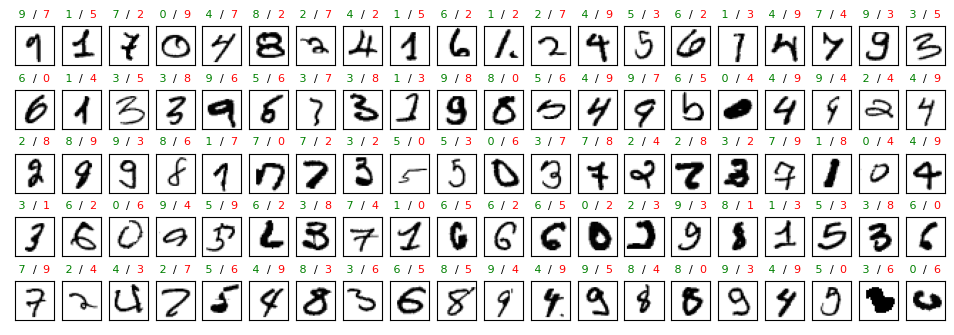

In [73]:
#@title mnist with version 4
from torchvision      import datasets
from matplotlib       import pyplot as plt

try:   plot_fails
except NameError: print("please run code cell 'plot fails' first...")
else:

  # play with me 
  eta, bs, epochs, sample = 0.02, 5, 50, 1.0

  # mnist data
  ds_train = datasets.MNIST (root="data", train=True,  download=True)
  ds_test  = datasets.MNIST (root="data", train=False, download=True)
  train    = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), batchSize=bs, sample=sample )
  evals    = Batches ( (ds_test. data.numpy(), ds_test. targets.numpy()) )
  bigtrain = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()))

  # create model (version 4) and train the data
  m = Model (Perceptrons(100,28*28), Perceptrons(40), Perceptrons(10)) 
  m.  train (train, epochs, eta, evals)

  plot_fails (m, next(iter(bigtrain)), columns=20, rows=5 )


TMSeed           : (0.07, 10000, 5000), ((784, 500, 100, 25, 10), "ta, ta, ta, so", "ce")
Number of epochs : 10000
Steps per epoch  : 12
Datasets per step: 5000 (5000 last step)
Limit output to  : 21 intervals

I00 epoch:     0 | loss: 2.30287 | acc: 8.84  | acc_eval: 8.52  | loss_eval: 2.30301 | no training
I01 epoch:   476 | loss: 1.47217 | acc: 99.04 | acc_eval: 97.33 | loss_eval: 1.48915 | time: 13.15
I02 epoch:   952 | loss: 1.468   | acc: 99.35 | acc_eval: 97.64 | loss_eval: 1.4855  | time: 13.21
I03 epoch:  1429 | loss: 1.46666 | acc: 99.47 | acc_eval: 97.65 | loss_eval: 1.4853  | time: 13.27
I04 epoch:  1905 | loss: 1.46619 | acc: 99.5  | acc_eval: 97.62 | loss_eval: 1.48495 | time: 13.25
I05 epoch:  2381 | loss: 1.46592 | acc: 99.53 | acc_eval: 97.68 | loss_eval: 1.48458 | time: 13.28
I06 epoch:  2857 | loss: 1.46575 | acc: 99.54 | acc_eval: 97.71 | loss_eval: 1.48407 | time: 13.27
I07 epoch:  3333 | loss: 1.46556 | acc: 99.56 | acc_eval: 97.74 | loss_eval: 1.48401 | time: 13.

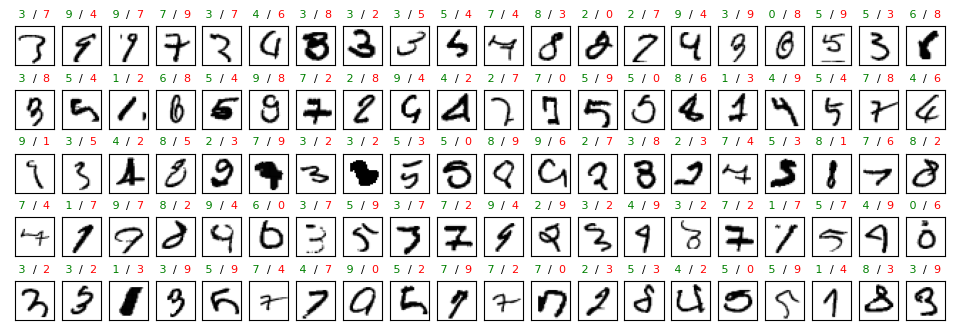

In [81]:
#@title mnist with version 5 
from torchvision import datasets

try:   plot_fails
except NameError: print ("please run code cell 'plot fails' first...")
else:

  # play with me 
  eta, bs, epochs = 0.07, 5000, 10000
  m               = MLP ( (28*28, 500, 100, 25, 10), "ta, ta, ta, so", loss='ce', tryCuda=True)

  # mnist data
  ds_train  = datasets.MNIST (root="data", train=True,  download=True)
  ds_test   = datasets.MNIST (root="data", train=False, download=True)
  train     = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), tryCuda=True, batchSize=bs)
  evals     = Batches ( (ds_test. data.numpy(), ds_test. targets.numpy()), tryCuda=True)
  bigtrain  = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), tryCuda=True)

  # train the data with model (version 5)
  m.train ( train, epochs, eta, evals )

  plot_fails (m, next(bigtrain), columns=20, rows=5)



# Experiments

In [93]:
#@title tool functions
from torchvision import datasets

# makes a training for a seed
def trainSeed (tseed, mseed, plot=False):
  try:   
    if plot: plot_fails
  except NameError: print ("please run code cell 'plot fails' first...")
  else:
    # data for training and the model from the seeds
    eta, bs, epochs = tseed
    m               = MLP ( mseed[0], mseed[1], loss=mseed[2], tryCuda=True)

    # mnist data
    ds_train  = datasets.MNIST (root="data", train=True,  download=True)
    ds_test   = datasets.MNIST (root="data", train=False, download=True)
    train     = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), tryCuda=True, batchSize=bs)
    evals     = Batches ( (ds_test. data.numpy(), ds_test. targets.numpy()), tryCuda=True)
    bigtrain  = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), tryCuda=True)

    # train the data with model (version 5)
    m.train ( train, epochs, eta, evals)

    # plot
    if plot: plot_fails (m, next(bigtrain), columns=20, rows=5)

# train a list of seeds
def trainSeeds (seedList):
  for tseed, mseed in seedList:
    eta, bs, epochs = tseed[0], tseed[1], tseed[2]

    # mnist data
    ds_train  = datasets.MNIST (root="data", train=True,  download=True)
    ds_test   = datasets.MNIST (root="data", train=False, download=True)
    train     = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), tryCuda=True, batchSize=bs)
    evals     = Batches ( (ds_test. data.numpy(), ds_test. targets.numpy()), tryCuda=True)
    bigtrain  = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), tryCuda=True)

    # training from seed / lineLimit = -1 --> output in one-line-mode
    m   = MLP ( mseed[0], mseed[1], loss=mseed[2], tryCuda=True)
    acc = m.train ( train, epochs, eta, evals, lineLimit=-1)[0]

    # it's your part ...


In [112]:
# make a list of variations

sl = [((1.0, 4000, 25), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce")),
      ((1.0, 8000, 50), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce")),
      ((1.0, 12000, 75), ((784, 4000, 17,  13, 10), "re, ta, ta, ta", "ce"))]

trainSeeds (sl)


(1.0, 4000, 25), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce").....................acc 99.71 acc_eval 98.33
(1.0, 8000, 50), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce").....................acc 99.68 acc_eval 98.28
(1.0, 12000, 75), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce").....................acc 99.67 acc_eval 98.22


TMSeed           : (1.0, 4000, 10000), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce")
Number of epochs : 10000
Steps per epoch  : 15
Datasets per step: 4000 (4000 last step)
Limit output to  : 21 intervals

I00 epoch:     0 | loss: 2.32693 | acc: 9.86  | acc_eval: 9.58  | loss_eval: 2.32649 | no training
I01 epoch:   476 | loss: 0.79922 | acc: 99.86 | acc_eval: 98.51 | loss_eval: 0.82694 | time: 80.84
I02 epoch:   952 | loss: 0.79917 | acc: 99.86 | acc_eval: 98.54 | loss_eval: 0.82684 | time: 81.88
I03 epoch:  1429 | loss: 0.79906 | acc: 99.87 | acc_eval: 98.56 | loss_eval: 0.82684 | time: 82.24
I04 epoch:  1905 | loss: 0.79906 | acc: 99.87 | acc_eval: 98.55 | loss_eval: 0.82678 | time: 82.21
I05 epoch:  2381 | loss: 0.79901 | acc: 99.87 | acc_eval: 98.54 | loss_eval: 0.82671 | time: 82.34
I06 epoch:  2857 | loss: 0.79889 | acc: 99.88 | acc_eval: 98.49 | loss_eval: 0.82732 | time: 82.47
I07 epoch:  3333 | loss: 0.79889 | acc: 99.88 | acc_eval: 98.57 | loss_eval: 0.82697 | time: 82.5

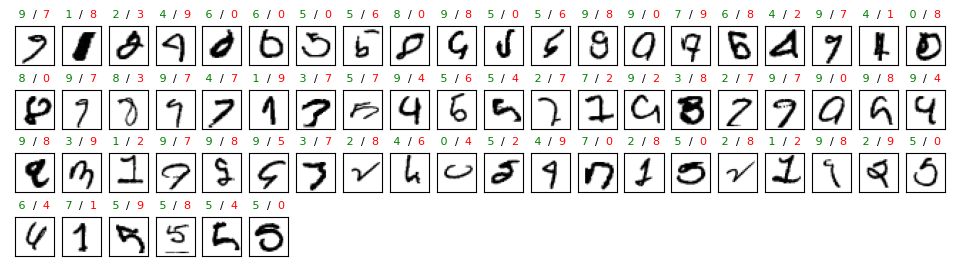

In [99]:
# make a deeper train of the best variation

trainSeed ( (1.0, 4000, 10000), ((784, 4000, 17, 13, 10), "re, ta, ta, ta", "ce") , plot=True )

# _


